<a href="https://colab.research.google.com/github/ashubansal005/Predicting-house-price-of-Bostan-dataset/blob/master/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
features = pd.DataFrame(boston.data , columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
target = pd.DataFrame(boston.target, columns=['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [5]:
df=pd.concat([features,target],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
df.describe().round(decimals=2)

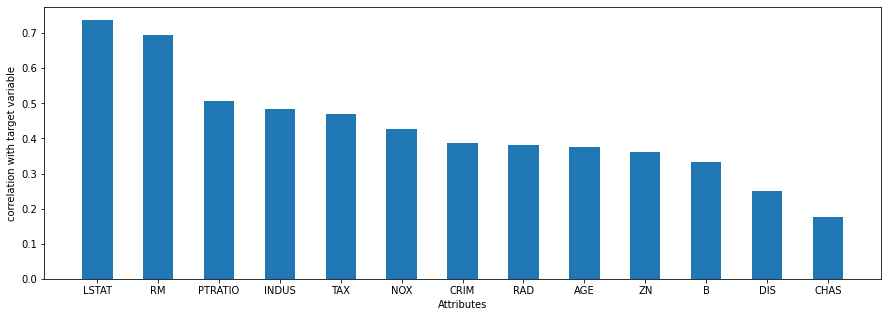

In [6]:
# define corelation function
corr = df.corr('pearson')
# take absolute value of corelation
corrs = [abs(corr[attr]['target']) for attr in list(features)]

#make a list of pairs[corr , features]

l = list(zip(corrs , list(features)))

#sort acc to abs value
l.sort(key=lambda x : x[0] , reverse = True)
corrs , labels = list(zip((*l)))

#plot corelation wrt target value

index = np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.5)
plt.xlabel('Attributes')
plt.ylabel('correlation with target variable')
plt.xticks(index, labels)
plt.show()


**Data** **Normalization**

In [7]:
# before normalizaton
X=df['RM'].values
Y=df['target'].values
print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [8]:
x_scaler=MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1,1))
X=X[:,-1]
y_scaler=MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:,-1]
print(Y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


In [9]:
def error(m,x,c,t):
    N=x.size
    e=sum((( m * x + c ) - t) ** 2)
    return e*1 / (2 * N)


In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2)

In [11]:
def update(m,x,c,t,learning_rate):
    grad_m = sum(2*(( m* x + c) - t) * x)
    grad_c = sum(2*(( m * x + c) - t))
    m= m-grad_m * learning_rate
    c= c - grad_c * learning_rate
    return m,c

In [12]:
def gradient_descent(init_m,init_c,x,t,learning_rate,iterations,error_threshold):
    m=init_m
    c=init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m,x,c,t)
        if e < error_threshold:
            print('error less then the threshold and stopping the gradient')
            break
        error_values.append(e)
        m,c=update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
        return m,c,error_values,mc_values

In [13]:
init_m = 0.9
init_c = 0.1
learning_rate = 0.001
iterations = 250
error_threshold = 0.001

In [14]:
m,c,error_values,mc_values=gradient_descent(init_m,init_c,xtrain,ytrain,learning_rate,iterations,error_threshold)


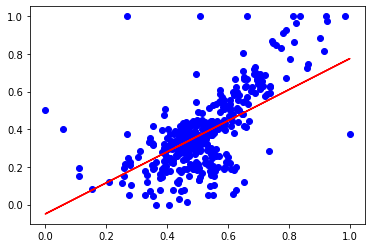

In [15]:
plt.scatter(xtrain,ytrain,color='b')
plt.plot(xtrain,(m*xtrain+c),color='r')

In [16]:
predicted = (m*xtest)+c

In [17]:
mean_squared_error(ytest,predicted)

0.027076700778091264

In [18]:
p=pd.DataFrame(list(zip(xtest,ytest,predicted)),columns=['x','target_y','predicted_y'])
p.head()

,x,target_y,predicted_y
0,0.447787,0.271111,0.319790
1,0.529795,0.431111,0.387370
2,0.897873,0.962222,0.690689
3,0.679441,0.562222,0.510687
4,0.555087,0.315556,0.408212


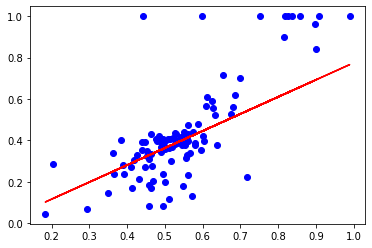

In [19]:
plt.scatter(xtest,ytest,color='b')
plt.plot(xtest,predicted,color='r')

In [20]:
predicted=predicted.reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)


xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)
predicted_scaled = y_scaler.inverse_transform(predicted)

#remove extra dimensions

xtest_scaled = xtest_scaled[:,-1]
ytest_scaled = ytest_scaled[:,-1]
predicted_scaled = predicted_scaled[:,-1]

p = pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predicted_scaled)),columns=['x','target_y','predicted_y'])
p=p.round(decimals=2)
p.head()

,x,target_y,predicted_y
0,5.90,17.2,19.39
1,6.33,24.4,22.43
2,8.25,48.3,36.08
3,7.11,30.3,27.98
4,6.46,19.2,23.37
